In [41]:
import urllib
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from urllib.request import urlopen
import cv2
from imutils import paths

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout,SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img,array_to_img
import os


In [61]:
dir_path ='c:\dl_proje\garbageclassicication_cnn\garbageclassification'

In [62]:
target_size=(224,224)
waste_label={'cardboard':0,'glass':1,'metal':2,'paper':3,'plastic':4,'trash':5}

In [63]:
def load_datasets(path):
    "görsellerin bulundugu dizindeki görüntüyü okuyup etiketleri olusturur"
    "parametreler:"
    "x:goruntulere ait matris bilgilerini tutar"
    "labels:görüntunun ait oldugu sınıf bilgisini tutan liste"
    x=[]
    labels=[]
    image_paths=sorted(list(paths.list_images(path)))
    for image_path in image_paths:
        img=cv2.imread(image_path)
        img=cv2.resize(img,target_size)
        x.append(img)
        label=image_path.split(os.path.sep)[-2]
        labels.append(waste_label[label])
    x,labels=shuffle(x,labels,random_state=42)
    print(f'xin boyutu{np.array(x).shape}')
    print(f'label sınıf sayısı {len(np.unique(labels))},gözlem sayısı {len(labels)}')
    return x,labels

In [64]:
x,labels=load_datasets(dir_path)

xin boyutu(2527, 224, 224, 3)
label sınıf sayısı 6,gözlem sayısı 2527


In [65]:
def goruntule(image_1,label_1):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.title(np.array(list(waste_label.keys()))[to_categorical(labels,num_classes=6)[i]==1][0].title())
        plt.axis('off')

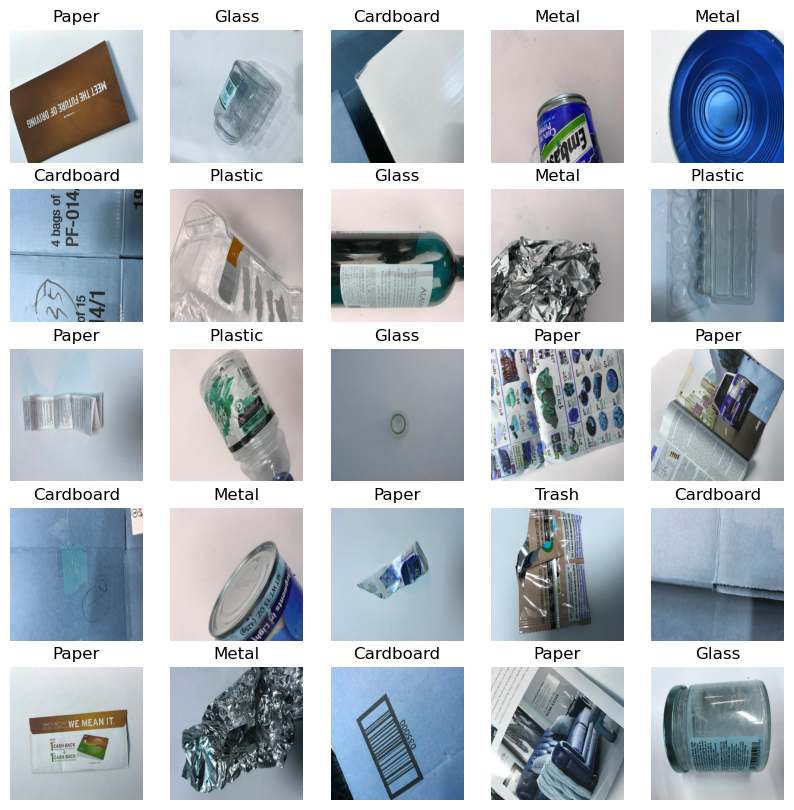

In [66]:
goruntule(x,labels)

In [48]:
def goruntule_2(imgs, lbls):
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(imgs[i])
        plt.title([k for k, v in waste_label.items() if v == lbls[i]][0])
        plt.axis("off")
    plt.show()
    

#YUKARIDAKİNE EK OLARAK BU DA KULLANILABİLİR.

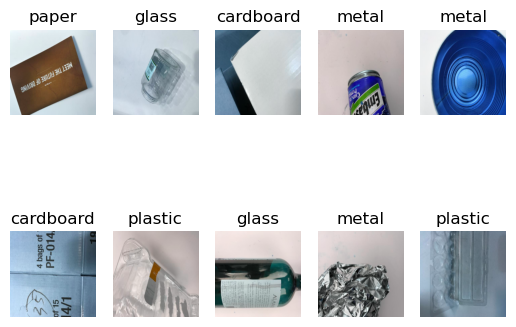

In [49]:
goruntule_2(x,labels)

-VERİYİ HAZIRLAMA-

In [55]:
#IMAGEDATAGENERATOR FONKSİYONUN GÖREVİ VERİ ÜRETMEKTİR,KÜÇÜK BİR GÖRÜNTÜ KÜMESİNDEN ÇEŞİTLİ VERİ ÜRETİR
#GÖRÜNTÜLERE GÖRÜNTÜ ÇEŞİTLENDİRME TEKNİKLERİ UYGULAYARAK GERÇEK DÜNYADAKİ GİBİ BİR HAL VERECEĞİZ
train=ImageDataGenerator(
    horizontal_flip=True,#görüntüleri rastgele yatay olarak cevirmekte
    vertical_flip=True,#dikey olarak
    validation_split=0.1,#test veri setinin oranı
    rescale=1./255,#yeniden ölçeklendirme,resimleri 0 ile 1 arasına ölçeklendiriyor
    shear_range=0.1,#görüntünün şekline eğim veriyor
    zoom_range=0.1,#genişlik kaydırma
    height_shift_range=0.1,
    width_shift_range=0.1
    
)

test=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [67]:
train_generator=train.flow_from_directory(directory=dir_path,
                                         target_size=(target_size),
                                         class_mode='categorical',#ikiden fazla sınıf oldugunda ikili olsaydı 'binary' olacaktı
                                          subset='training'
                                         )

test_generator=test.flow_from_directory(directory=dir_path,
                                       target_size=(target_size),
                                       class_mode='categorical',
                                       subset='validation',
                                       batch_size=251)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [70]:
input_shape=(224,224,3)

In [71]:
model=Sequential()

In [74]:
model.add(Conv2D(filters=32,#filtre 32 kez foto üstünde gezicek
                 kernel_size=(3,3),#filtrenin boyutu
                 padding='same',#foto etrafına benzer pikseller ekler BURASI EVRİŞİM KATMANI
                 input_shape=(input_shape),
                 activation='relu'
                 
                ))
model.add(MaxPooling2D( #BURASI HAVUZLAMA KATMANI
    pool_size=2,
    strides=(2,2)
))

model.add(Conv2D(filters=64,#filtre 32 kez foto üstünde gezicek
                 kernel_size=(3,3),#filtrenin boyutu
                 padding='same',#foto etrafına benzer pikseller ekler BURASI EVRİŞİM KATMANI
                 input_shape=(input_shape),
                 activation='relu'
                 
                ))
model.add(MaxPooling2D( #BURASI HAVUZLAMA KATMANI
    pool_size=2,
    strides=(2,2)
))

model.add(Conv2D(filters=32,#filtre 32 kez foto üstünde gezicek
                 kernel_size=(3,3),#filtrenin boyutu
                 padding='same',#foto etrafına benzer pikseller ekler BURASI EVRİŞİM KATMANI
                 input_shape=(input_shape),
                 activation='relu'
                 
                ))
model.add(MaxPooling2D( #BURASI HAVUZLAMA KATMANI
    pool_size=2,
    strides=(2,2)
))

In [75]:
model.add(Flatten(
#veriyi tek boyutlu diziye ceviricez
    
)) #BURADAN ÖNCE YUKARIDA YAPTIGIMIZ İKİ ADIMI BİRDEN FAZLA KEZ YAPARAK COK KATMANLAI AĞ OLUSTURABİLİRİZ 

In [76]:
model.add(Dense(units=64,activation='relu'))#DENSE KATMANI KATMANLAR ARASINDA NÖRONLARIN GEÇİŞLERİNİ SAĞLAMAKTA

In [77]:
model.add(Dropout(rate=0.2))#0.2 iterasyonda nöron söndürme işlemi rastgele gerçekleşir

In [78]:
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(rate=0.2))


model.add(Dense(units=6,activation='softmax'))#son katman
model.add(Dropout(rate=0.2))

In [84]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       6,422,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,444,262 (24.58 MB)

 Trainable params: 6,444,262 (24.58 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),'acc'])
callbacks=[EarlyStopping(monitor='val_los',patience=50,verbose=1,mode='min'),
          ModelCheckpoint(filepath='mymodel.h5',monitor='val_los',mode='min',save_best_only=True,save_weights_only=False,verbose=1)]

In [88]:
history=model.fit(train_generator,
                 validation_data=test_generator,
                 epochs=40,
                  callbacks=callbacks,
                  steps_per_epoch=2276//32,
                  validation_steps=251//32
                  
                 )

Epoch 1/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 43s 584ms/step - acc: 0.1999 - loss: 4.8206 - precision_1: 0.1816 - recall_1: 0.0213 - val_acc: 0.1912 - val_loss: 1.7266 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.1250 - loss: 5.6753 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_acc: 0.2032 - val_loss: 1.7279 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 571ms/step - acc: 0.2259 - loss: 4.5071 - precision_1: 0.1683 - recall_1: 0.0028 - val_acc: 0.1912 - val_loss: 1.7037 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - acc: 0.1875 - loss: 3.8301 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_acc: 0.1912 - val_loss: 1.7051 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 579ms/step - acc: 0.2563 - loss: 4.4911 - precision_1: 0.3203 - recall_1: 0.02